# This notebook is dedicated to compare the biodiversity indices calculated from field data and calculated from spectral species map. 

In [262]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae 

from scipy import stats
from matplotlib import pyplot as plt

In [263]:
# Set some directories. Here we use absolute directories. 
cwd = 'c:\\Users\\m1865\\Desktop\\Ticino'
cwd_Field = cwd + '\\FieldData'
cwd_Field_DataMerged = cwd_Field + '\\Field Dataset Merged'
cwd_Field_DataMerged_CSV_Indices = cwd_Field_DataMerged + "\\CSV Biodiversity Indices"
cwd_Raster = cwd + "\\Results"

In [264]:
df_Raster_6 = pd.read_csv(cwd_Raster + "\\2022 06Cropped Alpha Diversity.csv")
df_Raster_9 = pd.read_csv(cwd_Raster + "\\2022 09Cropped Alpha Diversity.csv")
df_Raster_6

,Plot,Raster 20Clusters Species Richness,Raster 20Clusters Shannon,Raster 20Clusters Simpson,Raster 35Clusters Species Richness,Raster 35Clusters Shannon,Raster 35Clusters Simpson,Raster 50Clusters Species Richness,Raster 50Clusters Shannon,Raster 50Clusters Simpson
0,FOR01,8.05,1.950667,0.84576,10.95,2.172363,0.86400,12.90,2.414920,0.89856
1,FOR02,4.85,1.193331,0.64176,8.35,1.830948,0.79808,9.85,2.074967,0.85056
2,FOR03,4.95,1.489291,0.75680,6.80,1.708687,0.79232,9.35,2.079390,0.85760
3,FOR04,3.00,0.797340,0.46224,5.10,1.347368,0.68304,8.10,1.865050,0.81488
4,FOR05,4.25,0.993256,0.53712,5.45,1.334504,0.66144,6.60,1.586574,0.74960
...,...,...,...,...,...,...,...,...,...,...
91,35,7.15,1.668232,0.77664,10.10,2.068282,0.84480,11.25,2.228674,0.87216
92,37,6.15,1.560562,0.74448,7.25,1.691592,0.76368,8.55,1.938696,0.83056
93,38,6.40,1.608977,0.76656,8.05,1.826176,0.80768,11.00,2.170192,0.86096
94,39,2.00,0.306179,0.16832,2.05,0.620760,0.42560,2.90,0.867365,0.53488


## Species Richness Comparison - June

In [265]:
df_Field_SpeciesRichness = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid SpeciesRichness.csv")
df_Field_SpeciesRichness

,Plot,Field Species Richness
0,FOR01,5
1,FOR02,7
2,FOR03,4
3,FOR04,2
4,FOR05,1
...,...,...
91,35,3
92,37,2
93,38,4
94,39,2


In [266]:
df_Raster_SpeciesRichness_6 = df_Raster_6.copy()
df_Raster_SpeciesRichness_6 = df_Raster_SpeciesRichness_6[['Plot','Raster 20Clusters Species Richness','Raster 35Clusters Species Richness','Raster 50Clusters Species Richness']]
df_Raster_SpeciesRichness_6

,Plot,Raster 20Clusters Species Richness,Raster 35Clusters Species Richness,Raster 50Clusters Species Richness
0,FOR01,8.05,10.95,12.90
1,FOR02,4.85,8.35,9.85
2,FOR03,4.95,6.80,9.35
3,FOR04,3.00,5.10,8.10
4,FOR05,4.25,5.45,6.60
...,...,...,...,...
91,35,7.15,10.10,11.25
92,37,6.15,7.25,8.55
93,38,6.40,8.05,11.00
94,39,2.00,2.05,2.90


In [267]:
df_Merge_SpeciesRichness_6 = pd.merge(df_Field_SpeciesRichness,df_Raster_SpeciesRichness_6,on='Plot')
df_Merge_SpeciesRichness_6

,Plot,Field Species Richness,Raster 20Clusters Species Richness,Raster 35Clusters Species Richness,Raster 50Clusters Species Richness
0,FOR01,5,8.05,10.95,12.90
1,FOR02,7,4.85,8.35,9.85
2,FOR03,4,4.95,6.80,9.35
3,FOR04,2,3.00,5.10,8.10
4,FOR05,1,4.25,5.45,6.60
...,...,...,...,...,...
91,35,3,7.15,10.10,11.25
92,37,2,6.15,7.25,8.55
93,38,4,6.40,8.05,11.00
94,39,2,2.00,2.05,2.90


In [268]:
df_Stat_SpeciesRichness_6 = df_Merge_SpeciesRichness_6.describe().copy()
df_Stat_SpeciesRichness_6.drop(index = ['count'], inplace = True)
df_Stat_SpeciesRichness_6

,Field Species Richness,Raster 20Clusters Species Richness,Raster 35Clusters Species Richness,Raster 50Clusters Species Richness
mean,3.614583,5.195833,7.115104,8.407813
std,1.675645,1.695655,2.480642,2.708994
min,1.000000,2.000000,2.050000,2.900000
25%,2.000000,4.000000,5.487500,6.487500
50%,4.000000,4.975000,6.850000,7.975000
75%,5.000000,6.362500,8.650000,10.525000
max,8.000000,9.950000,14.950000,16.200000


### 20 Clusters Null Hypothesis and Pearson Correlation Coefficient

In [269]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Merge_SpeciesRichness_6['Field Species Richness'], df_Merge_SpeciesRichness_6['Raster 20Clusters Species Richness'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Simpson and Raster Simpson!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")

-6.498994267706881
6.927684874855649e-10
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Simpson and Raster Simpson!


In [270]:
# Pearson correlation
res = stats.pearsonr(df_Merge_SpeciesRichness_6['Field Species Richness'], df_Merge_SpeciesRichness_6['Raster 20Clusters Species Richness'])
res

PearsonRResult(statistic=0.14724772560990576, pvalue=0.15224552423226245)

### 35 Clusters Null Hypothesis and Pearson Correlation Coefficient

In [271]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Merge_SpeciesRichness_6['Field Species Richness'], df_Merge_SpeciesRichness_6['Raster 35Clusters Species Richness'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Simpson and Raster Simpson!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")

-11.457267962462941
1.9150735667348245e-23
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Simpson and Raster Simpson!


In [272]:
# Pearson correlation
res = stats.pearsonr(df_Merge_SpeciesRichness_6['Field Species Richness'], df_Merge_SpeciesRichness_6['Raster 35Clusters Species Richness'])
res

PearsonRResult(statistic=0.23920652682513882, pvalue=0.01891413521239797)

### 50 Clusters Null Hypothesis and Pearson Correlation Coefficient

In [273]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Merge_SpeciesRichness_6['Field Species Richness'], df_Merge_SpeciesRichness_6['Raster 50Clusters Species Richness'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Simpson and Raster Simpson!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")

-14.743720654912481
2.6811531283047414e-33
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Simpson and Raster Simpson!


In [274]:
# Pearson correlation
res = stats.pearsonr(df_Merge_SpeciesRichness_6['Field Species Richness'], df_Merge_SpeciesRichness_6['Raster 50Clusters Species Richness'])
res

PearsonRResult(statistic=0.2097212614115818, pvalue=0.040287482572830005)

## Shannon Comparison - June

In [275]:
df_Field_Shannon = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid Shannon.csv")
df_Field_Shannon

,Plot,Field Shannon
0,FOR01,1.267990
1,FOR02,1.604816
2,FOR03,0.534923
3,FOR04,0.474139
4,FOR05,0.000000
...,...,...
91,35,0.758937
92,37,0.562335
93,38,0.846145
94,39,0.658110


In [276]:
df_Raster_Shannon_6 = df_Raster_6.copy()
df_Raster_Shannon_6 = df_Raster_Shannon_6[['Plot','Raster 20Clusters Shannon','Raster 35Clusters Shannon','Raster 50Clusters Shannon']]
df_Raster_Shannon_6

,Plot,Raster 20Clusters Shannon,Raster 35Clusters Shannon,Raster 50Clusters Shannon
0,FOR01,1.950667,2.172363,2.414920
1,FOR02,1.193331,1.830948,2.074967
2,FOR03,1.489291,1.708687,2.079390
3,FOR04,0.797340,1.347368,1.865050
4,FOR05,0.993256,1.334504,1.586574
...,...,...,...,...
91,35,1.668232,2.068282,2.228674
92,37,1.560562,1.691592,1.938696
93,38,1.608977,1.826176,2.170192
94,39,0.306179,0.620760,0.867365


In [277]:
df_Merge_Shannon_6 = pd.merge(df_Field_Shannon,df_Raster_Shannon_6,on='Plot')
df_Merge_Shannon_6

,Plot,Field Shannon,Raster 20Clusters Shannon,Raster 35Clusters Shannon,Raster 50Clusters Shannon
0,FOR01,1.267990,1.950667,2.172363,2.414920
1,FOR02,1.604816,1.193331,1.830948,2.074967
2,FOR03,0.534923,1.489291,1.708687,2.079390
3,FOR04,0.474139,0.797340,1.347368,1.865050
4,FOR05,0.000000,0.993256,1.334504,1.586574
...,...,...,...,...,...
91,35,0.758937,1.668232,2.068282,2.228674
92,37,0.562335,1.560562,1.691592,1.938696
93,38,0.846145,1.608977,1.826176,2.170192
94,39,0.658110,0.306179,0.620760,0.867365


In [278]:
r2_score(df_Merge_Shannon_6['Field Shannon'],df_Merge_Shannon_6['Raster 20Clusters Shannon'])

-0.9543203283054069

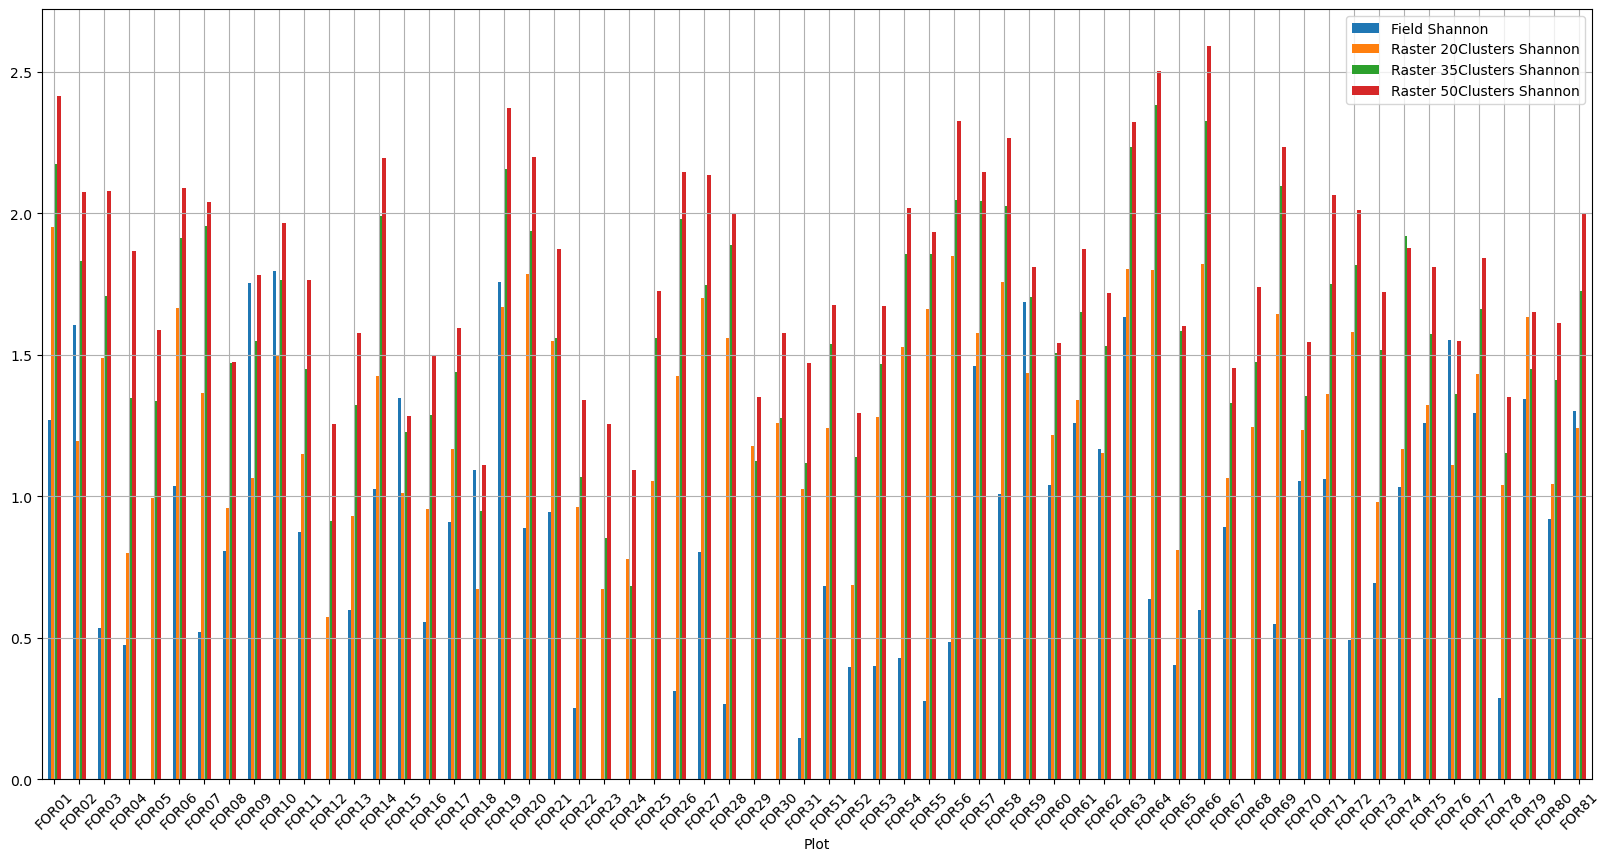

In [279]:
df_Merge_Shannon_6.iloc[0:62,:].plot(x = 'Plot', y = ['Field Shannon', 'Raster 20Clusters Shannon','Raster 35Clusters Shannon','Raster 50Clusters Shannon'], kind = 'bar', figsize=(20,10))
plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [280]:
df_Stat_Shannon_6 = df_Merge_Shannon_6.describe().copy()
df_Stat_Shannon_6.drop(index = ['count'], inplace = True)
df_Stat_Shannon_6

,Field Shannon,Raster 20Clusters Shannon,Raster 35Clusters Shannon,Raster 50Clusters Shannon
mean,0.890842,1.322535,1.639557,1.836367
std,0.476653,0.351765,0.383635,0.368634
min,0.000000,0.306179,0.620760,0.867365
25%,0.545387,1.062143,1.409198,1.586462
50%,0.930161,1.329013,1.639402,1.842660
75%,1.264803,1.578306,1.920514,2.099909
max,1.794190,2.107592,2.534111,2.632896


### 20 Clusters Null Hypothesis and Pearson Correlation Coefficient

In [281]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Merge_Shannon_6['Field Shannon'], df_Merge_Shannon_6['Raster 20Clusters Shannon'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Simpson and Raster Simpson!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")

-7.13997051731478
1.926473713869917e-11
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Simpson and Raster Simpson!


In [282]:
# Pearson correlation
res = stats.pearsonr(df_Merge_Shannon_6['Field Shannon'], df_Merge_Shannon_6['Raster 20Clusters Shannon'])
res

PearsonRResult(statistic=0.2840080637108463, pvalue=0.005043577355332875)

In [283]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Merge_Shannon_6['Field Shannon'], df_Merge_Shannon_6['Raster 35Clusters Shannon'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Simpson and Raster Simpson!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")

-11.989438942789997
4.99972911122569e-25
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Simpson and Raster Simpson!


In [284]:
# Pearson correlation
res = stats.pearsonr(df_Merge_Shannon_6['Field Shannon'], df_Merge_Shannon_6['Raster 35Clusters Shannon'])
res

PearsonRResult(statistic=0.33930213230804745, pvalue=0.0007200498222270612)

In [285]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Merge_Shannon_6['Field Shannon'], df_Merge_Shannon_6['Raster 50Clusters Shannon'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Simpson and Raster Simpson!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")

-15.374527759860166
3.4638368368241413e-35
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Simpson and Raster Simpson!


In [286]:
# Pearson correlation
res = stats.pearsonr(df_Merge_Shannon_6['Field Shannon'], df_Merge_Shannon_6['Raster 50Clusters Shannon'])
res

PearsonRResult(statistic=0.2780330297142344, pvalue=0.0060923010461047256)

### Only the first dataset

In [287]:
df_Merge_Shannon_1_6 = df_Merge_Shannon_6.loc[0:62,:]
df_Merge_Shannon_1_6

,Plot,Field Shannon,Raster 20Clusters Shannon,Raster 35Clusters Shannon,Raster 50Clusters Shannon
0,FOR01,1.267990,1.950667,2.172363,2.414920
1,FOR02,1.604816,1.193331,1.830948,2.074967
2,FOR03,0.534923,1.489291,1.708687,2.079390
3,FOR04,0.474139,0.797340,1.347368,1.865050
4,FOR05,0.000000,0.993256,1.334504,1.586574
...,...,...,...,...,...
58,FOR78,0.286836,1.040898,1.153376,1.350173
59,FOR79,1.344339,1.634144,1.448604,1.651942
60,FOR80,0.918320,1.043367,1.410515,1.611931
61,FOR81,1.301362,1.241117,1.724971,1.998662


In [288]:
# Pearson correlation
res = stats.pearsonr(df_Merge_Shannon_1_6['Field Shannon'], df_Merge_Shannon_1_6['Raster 20Clusters Shannon'])
res

PearsonRResult(statistic=0.3107109122679821, pvalue=0.01319413199973814)

In [289]:
# Pearson correlation
res = stats.pearsonr(df_Merge_Shannon_1_6['Field Shannon'], df_Merge_Shannon_1_6['Raster 35Clusters Shannon'])
res

PearsonRResult(statistic=0.37176183262409845, pvalue=0.002699796762101531)

In [290]:
# Pearson correlation
res = stats.pearsonr(df_Merge_Shannon_1_6['Field Shannon'], df_Merge_Shannon_1_6['Raster 50Clusters Shannon'])
res

PearsonRResult(statistic=0.31045865749799023, pvalue=0.013272668493593417)

### Only for the second dataset

In [291]:
df_Merge_Shannon_2_6 = df_Merge_Shannon_6.loc[63:,:]
df_Merge_Shannon_2_6.head()

,Plot,Field Shannon,Raster 20Clusters Shannon,Raster 35Clusters Shannon,Raster 50Clusters Shannon
63,1,0.529706,0.643656,0.814122,0.868821
64,2,1.277259,1.702833,2.135463,2.278509
65,3,1.086655,1.162044,1.605443,1.638774
66,4,1.334475,1.022368,1.472526,1.586127
67,5,1.365077,1.296688,1.741262,1.972998


In [292]:
r2_score(df_Merge_Shannon_2_6['Field Shannon'],df_Merge_Shannon_2_6['Raster 20Clusters Shannon'])

-2.3211701035800454

In [293]:
r2_score(df_Merge_Shannon_2_6['Field Shannon'],df_Merge_Shannon_2_6['Raster 35Clusters Shannon'])

-5.6802099435629785

In [294]:
r2_score(df_Merge_Shannon_2_6['Field Shannon'],df_Merge_Shannon_2_6['Raster 50Clusters Shannon'])

-8.52970815158481

In [295]:
mae(df_Merge_Shannon_2_6['Field Shannon'],df_Merge_Shannon_2_6['Raster 20Clusters Shannon'])

0.41981383300659464

In [296]:
# Pearson correlation
res = stats.pearsonr(df_Merge_Shannon_2_6['Field Shannon'], df_Merge_Shannon_2_6['Raster 20Clusters Shannon'])
res

PearsonRResult(statistic=0.0989499321189406, pvalue=0.5837920906690022)

In [297]:
# Pearson correlation
res = stats.pearsonr(df_Merge_Shannon_2_6['Field Shannon'], df_Merge_Shannon_2_6['Raster 35Clusters Shannon'])
res

PearsonRResult(statistic=0.15816835998523993, pvalue=0.3793329248772748)

In [298]:
# Pearson correlation
res = stats.pearsonr(df_Merge_Shannon_2_6['Field Shannon'], df_Merge_Shannon_2_6['Raster 50Clusters Shannon'])
res

PearsonRResult(statistic=0.11719675931479878, pvalue=0.5159964033050369)

### Remove 0 shannon index plot in dataset 1

In [299]:
df_Merge_Shannon_6_NoZero = df_Merge_Shannon_6.copy()
df_Merge_Shannon_6_NoZero = df_Merge_Shannon_6_NoZero[df_Merge_Shannon_6_NoZero['Field Shannon']!=0]
df_Merge_Shannon_6_NoZero

,Plot,Field Shannon,Raster 20Clusters Shannon,Raster 35Clusters Shannon,Raster 50Clusters Shannon
0,FOR01,1.267990,1.950667,2.172363,2.414920
1,FOR02,1.604816,1.193331,1.830948,2.074967
2,FOR03,0.534923,1.489291,1.708687,2.079390
3,FOR04,0.474139,0.797340,1.347368,1.865050
5,FOR06,1.035936,1.664498,1.913563,2.088612
...,...,...,...,...,...
91,35,0.758937,1.668232,2.068282,2.228674
92,37,0.562335,1.560562,1.691592,1.938696
93,38,0.846145,1.608977,1.826176,2.170192
94,39,0.658110,0.306179,0.620760,0.867365


In [300]:
df_Merge_Shannon_6_NoZero.describe()

,Field Shannon,Raster 20Clusters Shannon,Raster 35Clusters Shannon,Raster 50Clusters Shannon
count,88.000000,88.000000,88.000000,88.000000
mean,0.971828,1.354709,1.683939,1.871792
std,0.410465,0.341910,0.359040,0.358422
min,0.146145,0.306179,0.620760,0.867365
25%,0.607716,1.136359,1.448430,1.632063
50%,1.017380,1.361375,1.688537,1.875039
75%,1.272701,1.610005,1.928140,2.144057
max,1.794190,2.107592,2.534111,2.632896


In [301]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Merge_Shannon_6_NoZero['Field Shannon'],df_Merge_Shannon_6_NoZero['Raster 20Clusters Shannon'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Simpson and Raster Simpson!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")

-6.723436798450764
2.4474033175975913e-10
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Simpson and Raster Simpson!


In [302]:
r2_score(df_Merge_Shannon_6_NoZero['Field Shannon'],df_Merge_Shannon_6_NoZero['Raster 20Clusters Shannon'])

-1.3321545131192596

In [303]:
r2_score(df_Merge_Shannon_6_NoZero['Field Shannon'],df_Merge_Shannon_6_NoZero['Raster 35Clusters Shannon'])

-3.523208787854596

In [304]:
r2_score(df_Merge_Shannon_6_NoZero['Field Shannon'],df_Merge_Shannon_6_NoZero['Raster 50Clusters Shannon'])

-5.405156811278844

In [305]:
mae(df_Merge_Shannon_6_NoZero['Field Shannon'],df_Merge_Shannon_6_NoZero['Raster 20Clusters Shannon'])

0.48849956211708834

In [306]:
mae(df_Merge_Shannon_6_NoZero['Field Shannon'],df_Merge_Shannon_6_NoZero['Raster 35Clusters Shannon'])

0.7330619305400987

In [307]:
mae(df_Merge_Shannon_6_NoZero['Field Shannon'],df_Merge_Shannon_6_NoZero['Raster 50Clusters Shannon'])

0.9014509089259577

In [308]:
# Pearson correlation
res = stats.pearsonr(df_Merge_Shannon_6_NoZero['Field Shannon'], df_Merge_Shannon_6_NoZero['Raster 20Clusters Shannon'])
res

PearsonRResult(statistic=0.14515462963799136, pvalue=0.1772213061779264)

In [309]:
# Pearson correlation
res = stats.pearsonr(df_Merge_Shannon_6_NoZero['Field Shannon'], df_Merge_Shannon_6_NoZero['Raster 35Clusters Shannon'])
res

PearsonRResult(statistic=0.16368495631576538, pvalue=0.1275477767404996)

In [310]:
# Pearson correlation
res = stats.pearsonr(df_Merge_Shannon_6_NoZero['Field Shannon'], df_Merge_Shannon_6_NoZero['Raster 50Clusters Shannon'])
res

PearsonRResult(statistic=0.12589895301614987, pvalue=0.2424811807618386)

# Comparison of Simpson - June

In [311]:
df_Field_Simp = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid Simpson.csv")
df_Field_Simp

,Plot,Field Simpson
0,FOR01,0.685121
1,FOR02,0.752500
2,FOR03,0.250000
3,FOR04,0.297521
4,FOR05,0.000000
...,...,...
91,35,0.438776
92,37,0.375000
93,38,0.448980
94,39,0.465374


In [312]:
df_Raster_Simp_6 = df_Raster_6.copy()
df_Raster_Simp_6 = df_Raster_Simp_6[['Plot','Raster 20Clusters Simpson','Raster 35Clusters Simpson','Raster 50Clusters Simpson']]
df_Raster_Simp_6.head()

,Plot,Raster 20Clusters Simpson,Raster 35Clusters Simpson,Raster 50Clusters Simpson
0,FOR01,0.84576,0.86400,0.89856
1,FOR02,0.64176,0.79808,0.85056
2,FOR03,0.75680,0.79232,0.85760
3,FOR04,0.46224,0.68304,0.81488
4,FOR05,0.53712,0.66144,0.74960


In [313]:
df_Merge_Simp_6 = pd.merge(df_Field_Simp,df_Raster_Simp_6,on='Plot')
df_Merge_Simp_6.head()

,Plot,Field Simpson,Raster 20Clusters Simpson,Raster 35Clusters Simpson,Raster 50Clusters Simpson
0,FOR01,0.685121,0.84576,0.86400,0.89856
1,FOR02,0.752500,0.64176,0.79808,0.85056
2,FOR03,0.250000,0.75680,0.79232,0.85760
3,FOR04,0.297521,0.46224,0.68304,0.81488
4,FOR05,0.000000,0.53712,0.66144,0.74960


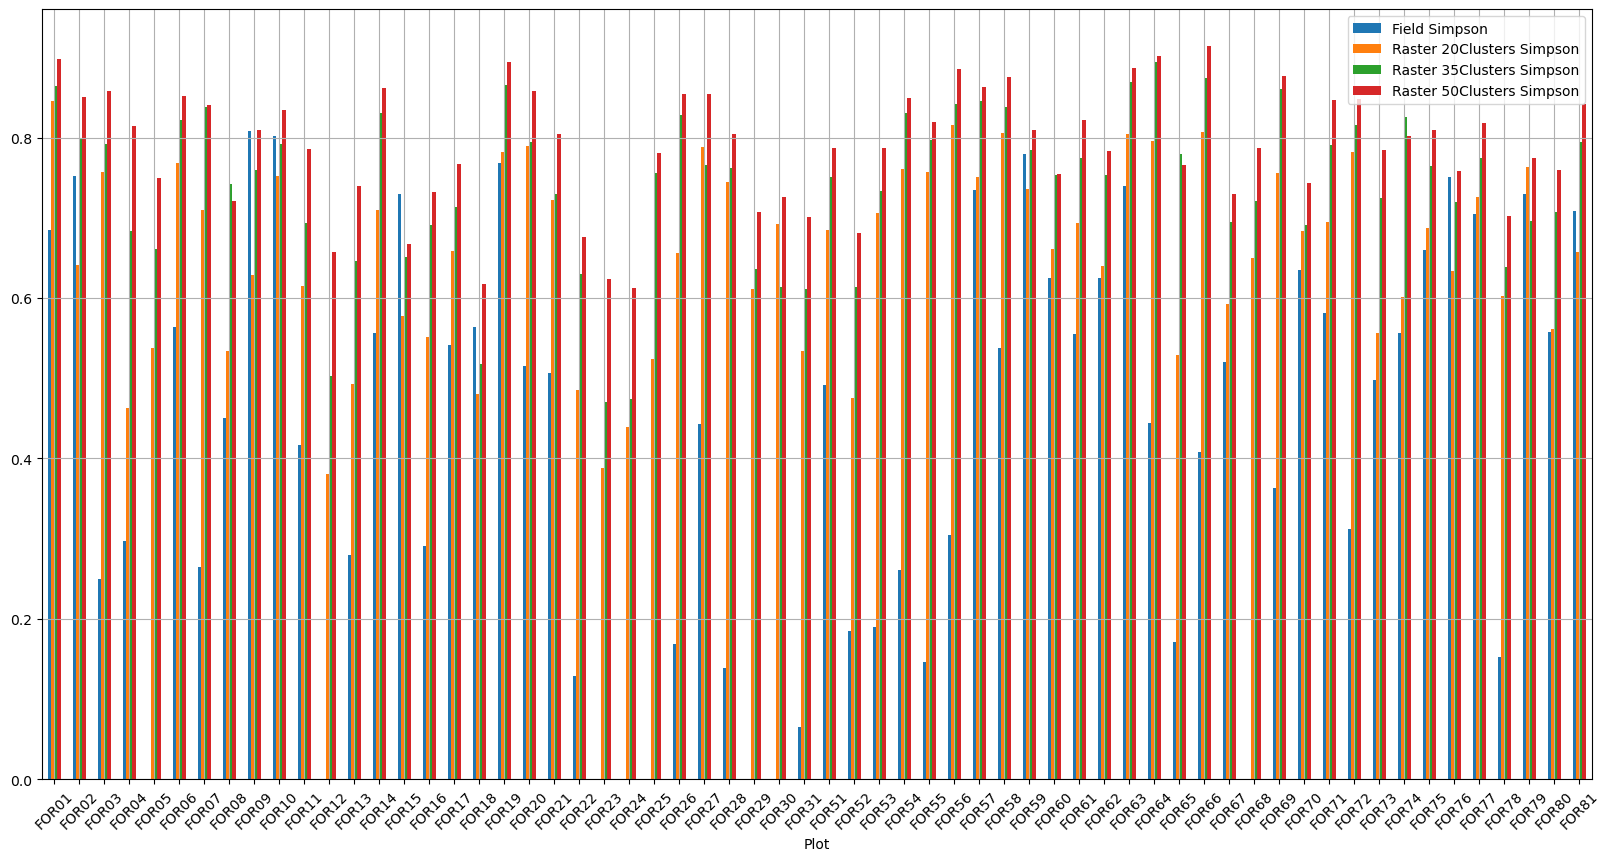

In [314]:
df_Merge_Simp_6.iloc[0:62,:].plot(x = 'Plot', y = ['Field Simpson', 'Raster 20Clusters Simpson','Raster 35Clusters Simpson','Raster 50Clusters Simpson'], kind = 'bar', figsize=(20,10))
plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [315]:
df_Merge_Simp_6_NoZero = df_Merge_Simp_6.copy()
df_Merge_Simp_6_NoZero = df_Merge_Simp_6_NoZero[df_Merge_Simp_6_NoZero['Field Simpson']!=0]
df_Merge_Simp_6_NoZero.describe()

,Field Simpson,Raster 20Clusters Simpson,Raster 35Clusters Simpson,Raster 50Clusters Simpson
count,88.000000,88.000000,88.000000,88.000000
mean,0.525486,0.679451,0.762987,0.803662
std,0.192073,0.115913,0.088059,0.075394
min,0.064444,0.168320,0.425600,0.532480
25%,0.414541,0.618640,0.719120,0.760240
50%,0.556347,0.700800,0.775120,0.818640
75%,0.686475,0.761760,0.826920,0.857840
max,0.807852,0.856960,0.904320,0.914720


In [316]:
print(r2_score(df_Merge_Simp_6_NoZero['Field Simpson'],df_Merge_Simp_6_NoZero['Raster 20Clusters Simpson']))
print(r2_score(df_Merge_Simp_6_NoZero['Field Simpson'],df_Merge_Simp_6_NoZero['Raster 35Clusters Simpson']))
print(r2_score(df_Merge_Simp_6_NoZero['Field Simpson'],df_Merge_Simp_6_NoZero['Raster 50Clusters Simpson']))

-0.7607910645955369
-1.5766796313430285
-2.149183530592205


In [317]:
# Pearson correlation
print(stats.pearsonr(df_Merge_Simp_6_NoZero['Field Simpson'], df_Merge_Simp_6_NoZero['Raster 20Clusters Simpson']))
print(stats.pearsonr(df_Merge_Simp_6_NoZero['Field Simpson'], df_Merge_Simp_6_NoZero['Raster 35Clusters Simpson']))
print(stats.pearsonr(df_Merge_Simp_6_NoZero['Field Simpson'], df_Merge_Simp_6_NoZero['Raster 50Clusters Simpson']))

PearsonRResult(statistic=0.2098985279980722, pvalue=0.04967017534938199)
PearsonRResult(statistic=0.19636399843897048, pvalue=0.06671117978803606)
PearsonRResult(statistic=0.1611581092468776, pvalue=0.1336132161959044)


In [318]:
print(mae(df_Merge_Simp_6_NoZero['Field Simpson'],df_Merge_Simp_6_NoZero['Raster 20Clusters Simpson']))
print(mae(df_Merge_Simp_6_NoZero['Field Simpson'],df_Merge_Simp_6_NoZero['Raster 35Clusters Simpson']))
print(mae(df_Merge_Simp_6_NoZero['Field Simpson'],df_Merge_Simp_6_NoZero['Raster 50Clusters Simpson']))

0.19168324266658276
0.24745970668771386
0.27996846330844793


## Comparison between different months

In [319]:
df_Raster = pd.merge(df_Raster_6,df_Raster_9,on='Plot',suffixes=[' 6',' 9'])
df_Raster = df_Raster[['Plot','Raster 20Clusters Species Richness 6','Raster 20Clusters Shannon 6','Raster 20Clusters Simpson 6','Raster 20Clusters Species Richness 9','Raster 20Clusters Shannon 9','Raster 20Clusters Simpson 9']]
df_Raster

,Plot,Raster 20Clusters Species Richness 6,Raster 20Clusters Shannon 6,Raster 20Clusters Simpson 6,Raster 20Clusters Species Richness 9,Raster 20Clusters Shannon 9,Raster 20Clusters Simpson 9
0,FOR01,8.05,1.950667,0.84576,8.80,1.821541,0.78608
1,FOR02,4.85,1.193331,0.64176,4.15,1.103780,0.58368
2,FOR03,4.95,1.489291,0.75680,4.55,1.131112,0.57248
3,FOR04,3.00,0.797340,0.46224,5.55,1.497574,0.74000
4,FOR05,4.25,0.993256,0.53712,5.10,1.324149,0.67648
...,...,...,...,...,...,...,...
91,35,7.15,1.668232,0.77664,7.90,1.725831,0.76576
92,37,6.15,1.560562,0.74448,5.15,1.279077,0.65040
93,38,6.40,1.608977,0.76656,5.15,1.462311,0.73920
94,39,2.00,0.306179,0.16832,2.70,0.571555,0.34496


In [320]:
df_Raster_Shannon = df_Raster.copy()
df_Raster_Shannon = df_Raster_Shannon[['Plot','Raster 20Clusters Shannon 6','Raster 20Clusters Shannon 9']]
df_Raster_Shannon

,Plot,Raster 20Clusters Shannon 6,Raster 20Clusters Shannon 9
0,FOR01,1.950667,1.821541
1,FOR02,1.193331,1.103780
2,FOR03,1.489291,1.131112
3,FOR04,0.797340,1.497574
4,FOR05,0.993256,1.324149
...,...,...,...
91,35,1.668232,1.725831
92,37,1.560562,1.279077
93,38,1.608977,1.462311
94,39,0.306179,0.571555


In [321]:
df_Raster_Shannon.describe()

,Raster 20Clusters Shannon 6,Raster 20Clusters Shannon 9
count,96.000000,96.000000
mean,1.322535,1.257179
std,0.351765,0.426804
min,0.306179,0.069363
25%,1.062143,0.990897
50%,1.329013,1.325009
75%,1.578306,1.588839
max,2.107592,1.984929


In [322]:
mae(df_Raster_Shannon['Raster 20Clusters Shannon 6'],df_Raster_Shannon['Raster 20Clusters Shannon 9'])

0.2949968970129754

<Axes: xlabel='Plot'>

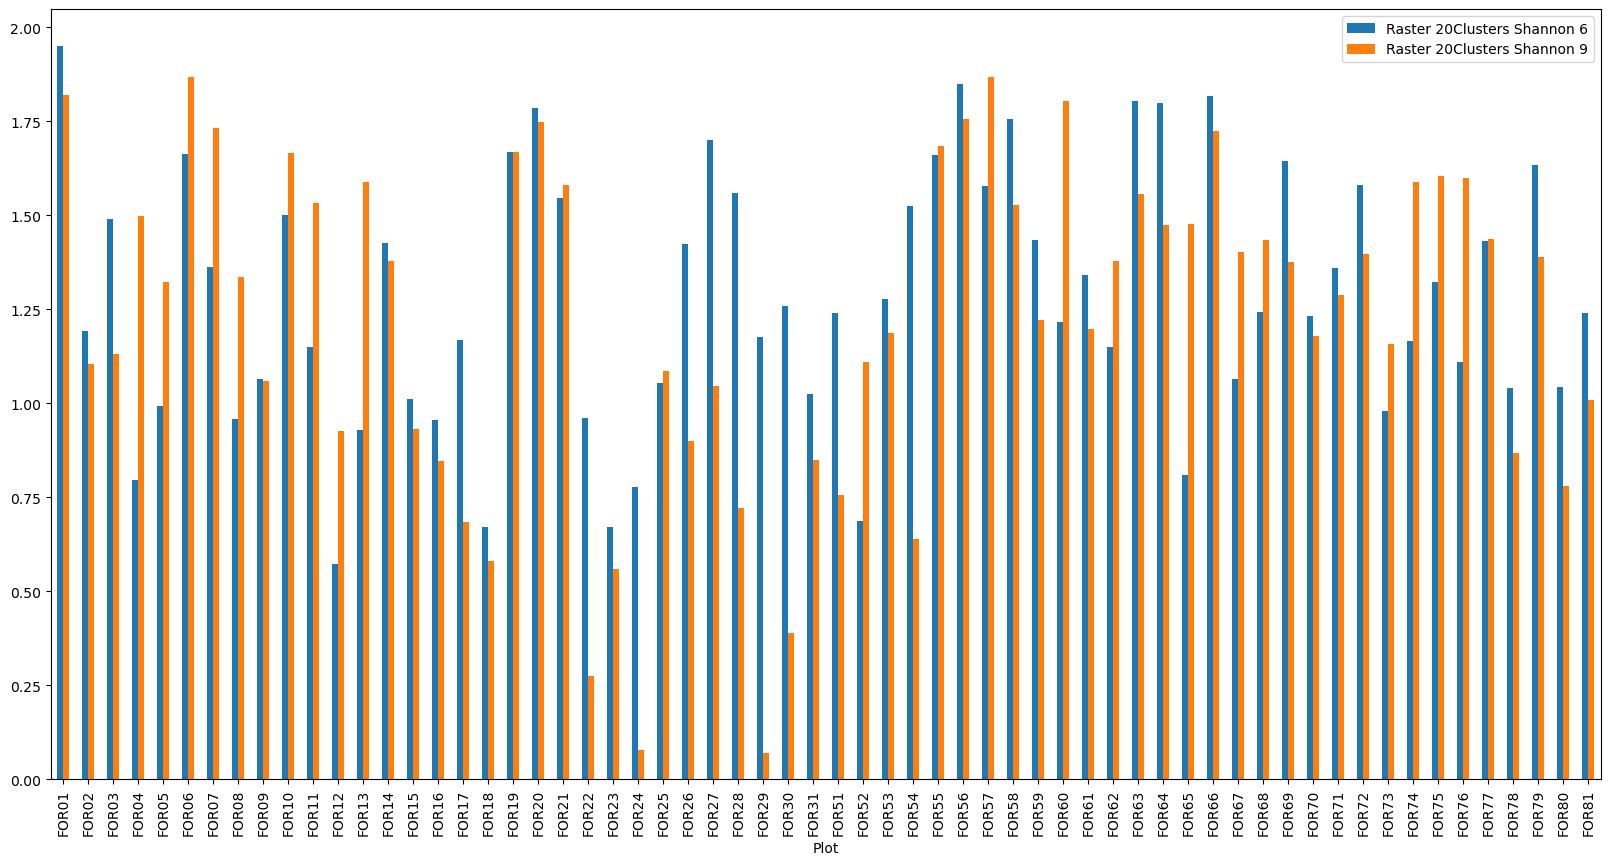

In [323]:
df_Raster_Shannon.iloc[0:62,:].plot(x = 'Plot',y = ['Raster 20Clusters Shannon 6','Raster 20Clusters Shannon 9'],kind = 'bar',figsize=(20,10))

In [324]:
df_Raster_Rich = df_Raster.copy()
df_Raster_Rich = df_Raster_Rich[['Plot','Raster 20Clusters Species Richness 6','Raster 20Clusters Species Richness 9']]
df_Raster_Rich.describe()

,Raster 20Clusters Species Richness 6,Raster 20Clusters Species Richness 9
count,96.000000,96.000000
mean,5.195833,5.285417
std,1.695655,1.732520
min,2.000000,1.150000
25%,4.000000,4.000000
50%,4.975000,5.200000
75%,6.362500,6.500000
max,9.950000,8.800000


In [325]:
mae(df_Raster_Rich['Raster 20Clusters Species Richness 6'],df_Raster_Rich['Raster 20Clusters Species Richness 9'])

1.351041666666667

<Axes: xlabel='Plot'>

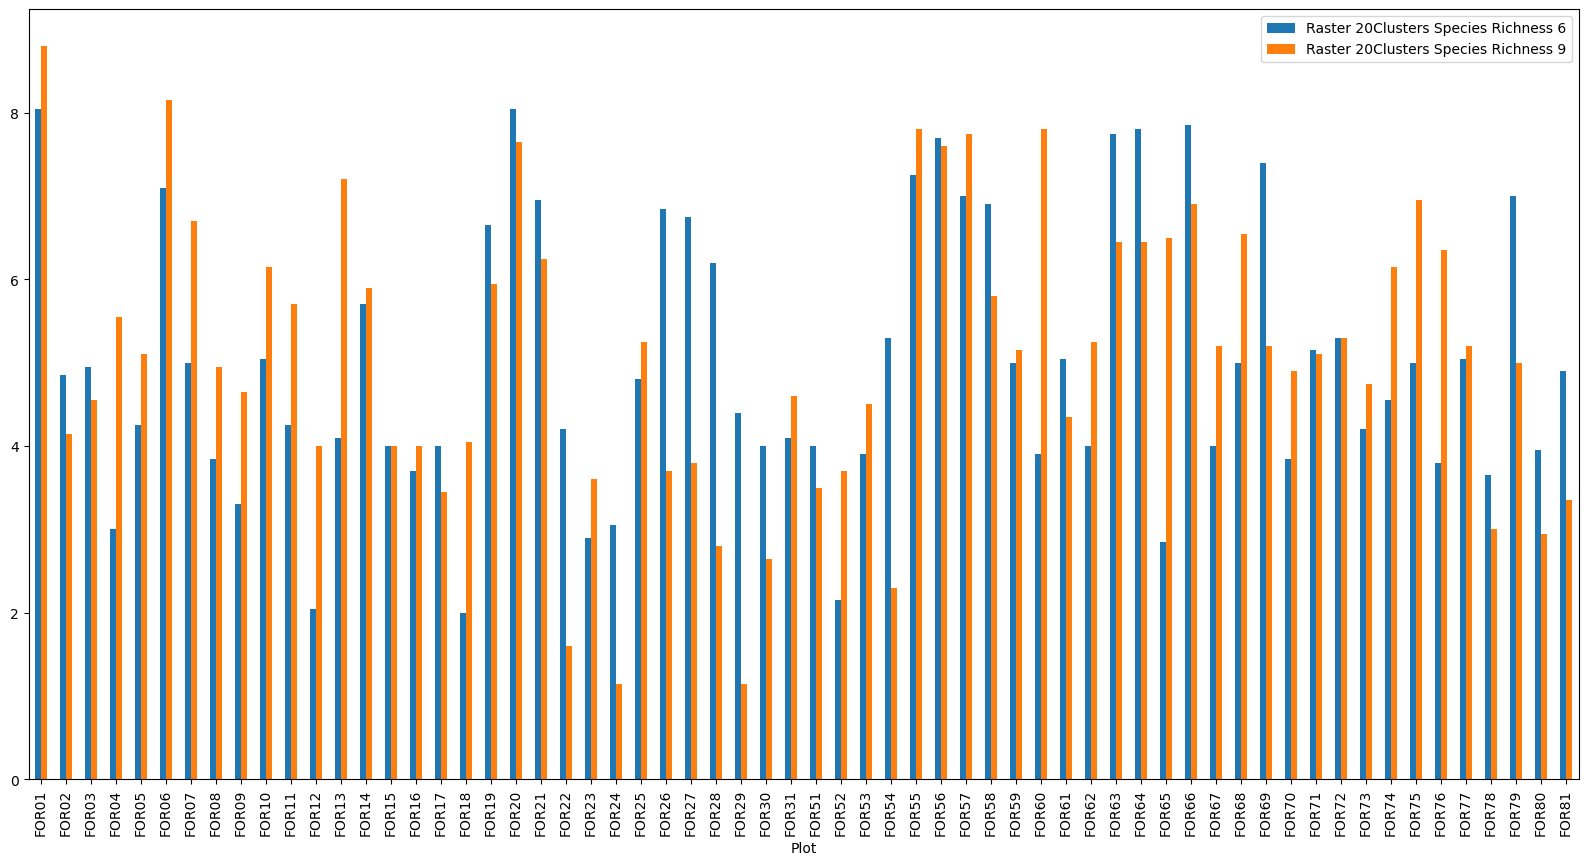

In [326]:
df_Raster_Rich.iloc[0:62,:].plot(x = 'Plot',y = ['Raster 20Clusters Species Richness 6','Raster 20Clusters Species Richness 9'],kind = 'bar',figsize=(20,10))

## 20 Cluster | 10 Window Size (100m x 100m) | June | Shannon | Both Datasets (No Zero)

Text(0.5, 1.0, 'X: True Value | Y: Predicted Value')

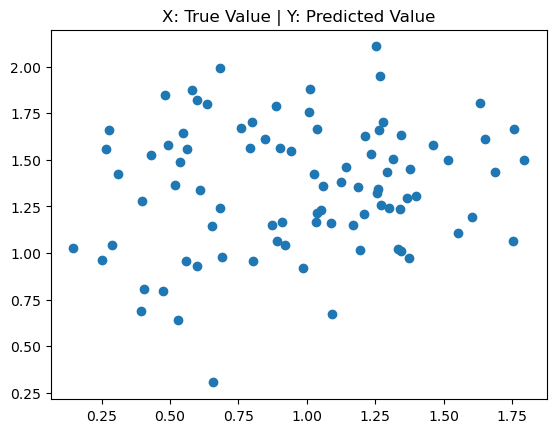

In [327]:
plt.scatter(df_Merge_Shannon_6_NoZero['Field Shannon'],df_Merge_Shannon_6_NoZero['Raster 20Clusters Shannon'])
plt.title('X: True Value | Y: Predicted Value')

Text(0.5, 1.0, 'X: True Value | Y: abs(Predicted Value - True Value)')

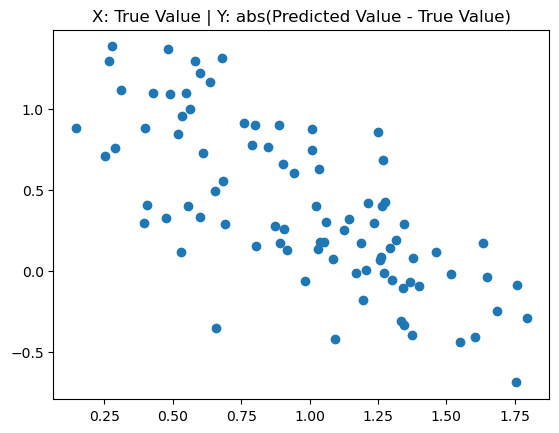

In [328]:
plt.scatter(df_Merge_Shannon_6_NoZero['Field Shannon'],df_Merge_Shannon_6_NoZero['Raster 20Clusters Shannon'] - df_Merge_Shannon_6_NoZero['Field Shannon'])
plt.title('X: True Value | Y: abs(Predicted Value - True Value)')

In [329]:
# Pearson correlation
res = stats.pearsonr(df_Merge_Shannon_6_NoZero['Field Shannon'],df_Merge_Shannon_6_NoZero['Raster 20Clusters Shannon'] - df_Merge_Shannon_6_NoZero['Field Shannon'])
res

PearsonRResult(statistic=-0.7295312795937879, pvalue=7.552707044397875e-16)

Text(0.5, 1.0, 'X: True Value | Y: abs(Predicted Value - True Value)/True Value')

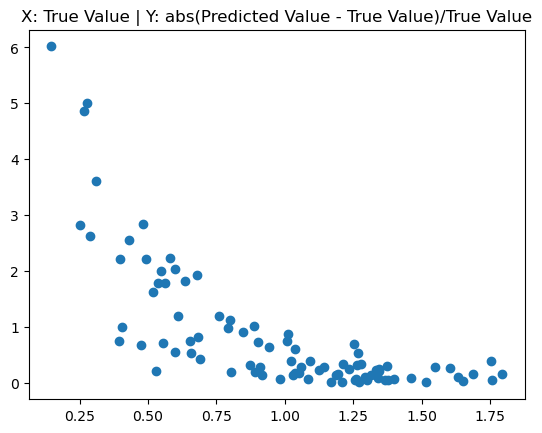

In [330]:
plt.scatter(df_Merge_Shannon_6_NoZero['Field Shannon'],abs(df_Merge_Shannon_6_NoZero['Raster 20Clusters Shannon'] - df_Merge_Shannon_6_NoZero['Field Shannon'])/df_Merge_Shannon_6_NoZero['Field Shannon'])
plt.title('X: True Value | Y: abs(Predicted Value - True Value)/True Value')

### Attempt of linear regression model

In [331]:
from sklearn.linear_model import LinearRegression

In [332]:
temp_x1 = df_Merge_Shannon_6_NoZero['Field Shannon'].values.reshape(-1,1)
temp_y1 = (df_Merge_Shannon_6_NoZero['Raster 20Clusters Shannon'] - df_Merge_Shannon_6_NoZero['Field Shannon']).values.reshape(-1,1)

In [333]:
reg = LinearRegression().fit(temp_x1,temp_y1)

In [334]:
reg.score(temp_x1,temp_y1)

0.5322158879057495

In [335]:
reg.coef_

array([[-0.87908878]])

In [336]:
reg.intercept_

array([1.23720448])

In [337]:
temp_y1_Predict = reg.predict(temp_x1)
temp_y1_Predict

array([[ 0.12252856],
       [-0.17357085],
       [ 0.76695934],
       [ 0.82039393],
       [ 0.32652439],
       [ 0.7816728 ],
       [ 0.53002347],
       [-0.30482784],
       [-0.34004784],
       [ 0.46980527],
       [ 0.71130707],
       [ 0.33653465],
       [ 0.05469564],
       [ 0.74786243],
       [ 0.43893755],
       [ 0.27632062],
       [-0.30694726],
       [ 0.45792351],
       [ 0.40910068],
       [ 1.01659293],
       [ 0.96514647],
       [ 0.53310262],
       [ 1.00302889],
       [ 1.10873028],
       [ 0.63591792],
       [ 0.8904939 ],
       [ 0.8869399 ],
       [ 0.85979143],
       [ 0.99440814],
       [ 0.81297596],
       [-0.04653582],
       [ 0.3501779 ],
       [-0.24544031],
       [ 0.32417511],
       [ 0.13025547],
       [ 0.21060929],
       [-0.19944215],
       [ 0.67765202],
       [ 0.88160433],
       [ 0.7112724 ],
       [ 0.45295367],
       [ 0.75469517],
       [ 0.31159207],
       [ 0.30564758],
       [ 0.80528403],
       [ 0

In [338]:
temp_z1_correct = abs(df_Merge_Shannon_6_NoZero['Raster 20Clusters Shannon'].values.reshape(-1,1) - temp_y1_Predict)
temp_z1_correct

array([[1.8281385 ],
       [1.36690223],
       [0.7223319 ],
       [0.0230539 ],
       [1.33797365],
       [0.5813126 ],
       [0.42778845],
       [1.3696134 ],
       [1.83991587],
       [0.68015614],
       [0.21872211],
       [1.08897979],
       [0.95691415],
       [0.20795027],
       [0.7291064 ],
       [0.39578984],
       [1.9745631 ],
       [1.32859601],
       [1.13848827],
       [0.05551876],
       [0.4599192 ],
       [1.1682371 ],
       [0.5561811 ],
       [0.0832671 ],
       [0.60406074],
       [0.20365316],
       [0.39082105],
       [0.6659701 ],
       [0.66504626],
       [1.03623048],
       [1.62374994],
       [1.40628008],
       [1.68141506],
       [0.89266892],
       [1.21065235],
       [0.94013758],
       [2.00274319],
       [1.12024138],
       [0.07222828],
       [1.10749359],
       [0.61190956],
       [0.89014217],
       [0.92041153],
       [1.05411613],
       [0.77629787],
       [0.35035673],
       [0.83677314],
       [1.190

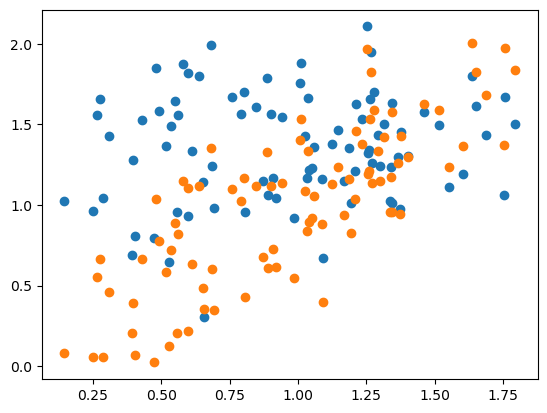

In [339]:
temp_z1_original = df_Merge_Shannon_6_NoZero['Raster 20Clusters Shannon'].values.reshape(-1,1)
plt.plot(temp_x1,temp_z1_original,'o',temp_x1,temp_z1_correct,'o')

In [340]:
stats.pearsonr(temp_x1.reshape(-1), temp_z1_original.reshape(-1))

PearsonRResult(statistic=0.14515462963799136, pvalue=0.1772213061779264)

In [341]:
stats.pearsonr(temp_x1.reshape(-1), temp_z1_correct.reshape(-1))

PearsonRResult(statistic=0.7844974154523917, pvalue=1.546842574245232e-19)

In [342]:
r2_score(temp_x1.reshape(-1), temp_z1_correct.reshape(-1))

0.442548759061719

### Expotential Regression Fit Attempt

In [343]:
temp_x2 = df_Merge_Shannon_6_NoZero['Field Shannon'].values.reshape(-1)
temp_y2 = (abs(df_Merge_Shannon_6_NoZero['Raster 20Clusters Shannon'] - df_Merge_Shannon_6_NoZero['Field Shannon'])/df_Merge_Shannon_6_NoZero['Field Shannon']).values.reshape(-1)

In [344]:
reg_exp = np.poly1d(np.polyfit(temp_x2,temp_y2,2))
reg_exp

poly1d([ 2.98006028, -7.84293265,  5.17039252])

In [345]:
temp_y2_predict = reg_exp(temp_x2)
temp_y2_predict

array([0.01696918, 0.25887767, 1.82774795, 2.12169148, 0.24370714,
       1.90648966, 0.78966776, 0.58242036, 0.69184623, 0.5948387 ,
       1.54501568, 0.26309435, 0.01267826, 1.72803724, 0.50581188,
       0.158133  , 0.58873471, 0.55970013, 0.42674269, 3.38985007,
       3.02860183, 0.8003816 , 3.29262423, 4.08783811, 1.20010924,
       2.540705  , 2.51854945, 2.3525205 , 3.23156897, 2.07956892,
       0.07227208, 0.29076213, 0.41957388, 0.23926918, 0.01970938,
       0.07549807, 0.3121355 , 1.38562705, 2.48547047, 1.54484698,
       0.54532553, 1.76338986, 0.21622346, 0.20576089, 2.03633892,
       1.17229907, 0.25071598, 0.02060908, 0.17462386, 0.01153391,
       3.16594133, 0.01253826, 0.48118955, 0.01075842, 0.05489493,
       1.85211359, 0.0145784 , 0.16674273, 0.01115646, 0.01733475,
       0.05905038, 0.33823695, 0.01823647, 0.04201198, 0.83123947,
       0.34274524, 0.09744824, 0.13007119, 0.01014115, 0.04499102,
       0.0225535 , 1.21279359, 1.62435595, 0.2886074 , 0.03136

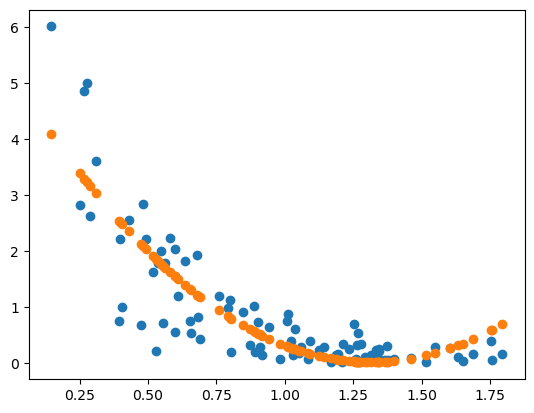

In [346]:
plt.plot(temp_x2,temp_y2,'o',temp_x2,temp_y2_predict,'o')

In [347]:
temp_y2_correct = temp_y2_predict * df_Merge_Shannon_6_NoZero['Field Shannon'].values.reshape(-1) + df_Merge_Shannon_6_NoZero['Field Shannon'].values.reshape(-1) if 
temp_y2_correct

SyntaxError: invalid syntax (1874356923.py, line 1)

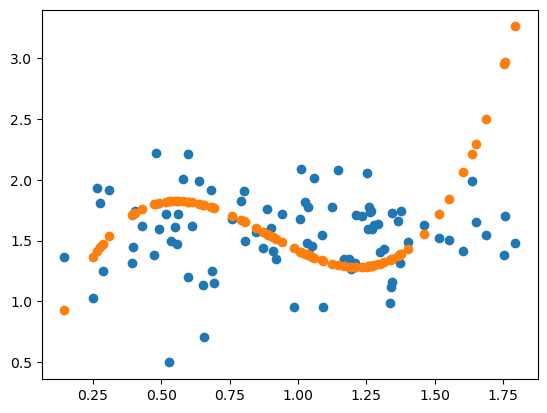

In [ ]:
temp_y2_original = df_Merge_Shannon_6_NoZero['Raster 20Clusters Shannon'].values.reshape(-1)
plt.plot(temp_x2,temp_y2_original,'o',temp_x2,temp_y2_correct,'o')

## Test Linear Regression with September Satellite Data

In [348]:
df_Raster_Shannon_9 = df_Raster_9.copy()
df_Raster_Shannon_9 = df_Raster_Shannon_9[['Plot','Raster 20Clusters Shannon','Raster 35Clusters Shannon','Raster 50Clusters Shannon']]
df_Raster_Shannon_9

,Plot,Raster 20Clusters Shannon,Raster 35Clusters Shannon,Raster 50Clusters Shannon
0,FOR01,1.821541,2.063586,2.264508
1,FOR02,1.103780,1.370757,1.588507
2,FOR03,1.131112,1.412968,1.557298
3,FOR04,1.497574,1.885979,2.016626
4,FOR05,1.324149,1.679235,1.922133
...,...,...,...,...
91,35,1.725831,1.822430,2.043806
92,37,1.279077,1.616802,1.752039
93,38,1.462311,1.831414,2.046655
94,39,0.571555,0.979324,0.840883


In [349]:
df_Merge_Shannon_9 = pd.merge(df_Field_Shannon,df_Raster_Shannon_9,on='Plot')

In [350]:
df_Merge_Shannon_9_NoZero = df_Merge_Shannon_9.copy()
df_Merge_Shannon_9_NoZero = df_Merge_Shannon_9_NoZero[df_Merge_Shannon_9_NoZero['Field Shannon']!=0]
df_Merge_Shannon_9_NoZero

,Plot,Field Shannon,Raster 20Clusters Shannon,Raster 35Clusters Shannon,Raster 50Clusters Shannon
0,FOR01,1.267990,1.821541,2.063586,2.264508
1,FOR02,1.604816,1.103780,1.370757,1.588507
2,FOR03,0.534923,1.131112,1.412968,1.557298
3,FOR04,0.474139,1.497574,1.885979,2.016626
5,FOR06,1.035936,1.866992,1.992587,2.129811
...,...,...,...,...,...
91,35,0.758937,1.725831,1.822430,2.043806
92,37,0.562335,1.279077,1.616802,1.752039
93,38,0.846145,1.462311,1.831414,2.046655
94,39,0.658110,0.571555,0.979324,0.840883


In [355]:
temp_x3 = df_Merge_Shannon_9_NoZero['Field Shannon'].values.reshape(-1,1)
temp_y3_Predict = reg.predict(temp_x3)
temp_z3_correct = abs(df_Merge_Shannon_9_NoZero['Raster 20Clusters Shannon'].values.reshape(-1,1) - temp_y1_Predict)
temp_z3_correct

array([[1.69901205],
       [1.27735053],
       [0.36415272],
       [0.6771801 ],
       [1.54046779],
       [0.94996995],
       [0.80701358],
       [1.36429104],
       [2.00695529],
       [1.06394674],
       [0.87812736],
       [1.04180561],
       [0.87703591],
       [0.09982259],
       [0.24658423],
       [0.30567501],
       [1.9746897 ],
       [1.29178663],
       [1.17232182],
       [0.74069993],
       [0.06542291],
       [0.51330492],
       [0.28239988],
       [0.26046652],
       [0.12116066],
       [0.22057365],
       [0.3001628 ],
       [0.2217941 ],
       [0.69084525],
       [0.94258702],
       [1.91480852],
       [1.17642041],
       [1.46608669],
       [1.47957228],
       [1.06790857],
       [1.16829701],
       [1.75778466],
       [0.79658822],
       [0.59508905],
       [1.01387865],
       [0.95001391],
       [0.62027535],
       [0.8683337 ],
       [0.98343836],
       [0.59270032],
       [0.52939939],
       [1.25845156],
       [1.471

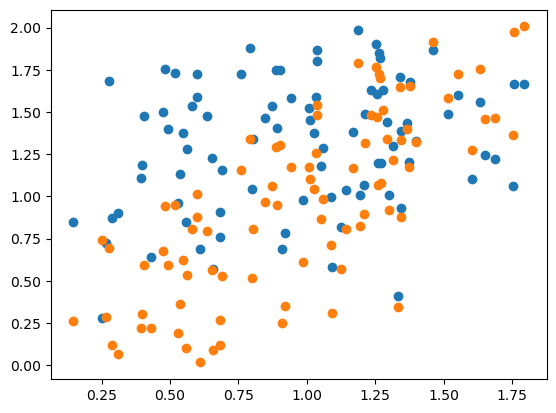

In [356]:
temp_z3_original = df_Merge_Shannon_9_NoZero['Raster 20Clusters Shannon'].values.reshape(-1,1)
plt.plot(temp_x3,temp_z3_original,'o',temp_x3,temp_z3_correct,'o')

In [357]:
stats.pearsonr(temp_x1.reshape(-1), temp_z3_correct.reshape(-1))

PearsonRResult(statistic=0.751820333690535, pvalue=3.152053192246611e-17)

In [359]:
stats.pearsonr(temp_x1.reshape(-1), temp_z3_original.reshape(-1))

PearsonRResult(statistic=0.26283755573766104, pvalue=0.013359258535087834)

In [358]:
r2_score(temp_x1.reshape(-1), temp_z3_correct.reshape(-1))

0.2910888372188817

In [360]:
r2_score(temp_x1.reshape(-1), temp_z3_original.reshape(-1))

-1.0520403503678315

In [ ]:
8